In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import imageio
import glob 
from pathlib import Path
import os
# Load the image
image_path = '../data/Jockey/frame_005.png'

# Load the SAM model
sam_checkpoint = "../checkpoints/sam_vit_h_4b8939.pth"  # Replace with the actual path to the model checkpoint
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam = sam.to(device=device)

In [8]:
def get_mask(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Generate masks
    mask_generator = SamAutomaticMaskGenerator(sam)
    masks = mask_generator.generate(image)
    return masks

In [4]:
masks = get_mask(image_path)

(-0.5, 1919.5, 1079.5, -0.5)

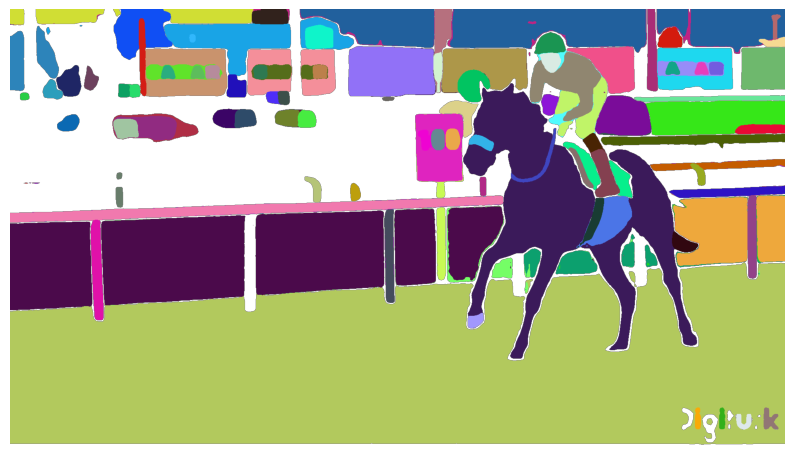

In [5]:
def show_masks_only(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    height, width = sorted_anns[0]['segmentation'].shape
    img = np.zeros((height, width, 4))  # Initialize an empty image with alpha channel

    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [1]])  # Use full opacity
        img[m] = color_mask
    
    return img

# Display only the masks
plt.figure(figsize=(10, 10))
img = show_masks_only(masks)
plt.imshow(img)
plt.axis('off')
# plt.savefig('m.png')
# plt.show()

In [8]:
file_paths = sorted(glob.glob('../data/pix2pix_data/A/train/*.png'))

In [18]:
# files = glob.glob('../data/Jockey/frame*')
# print(len(files))
# mask_data = []
# for path in files:
#     masks = get_mask(path)
#     mask_data.append(masks)


In [17]:
out_path = '../data/compressed_videos/mask.npz'
np.savez(out_path,mask_data[0],mask_data[1],mask_data[2],mask_data[3],mask_data[4],mask_data[5],mask_data[6],mask_data[7],mask_data[8],mask_data[9])

In [19]:
# compressed video size 
import os

file_size_bytes = os.path.getsize(out_path)
# Convert file size to bits
file_size_bits = file_size_bytes * 8
print(file_size_bits )
print('bpp:', file_size_bits/(1080*1920*10))

13371675776
bpp: 644.8531913580247


In [17]:
root_dir = '../data/pix2pix_data/'
sub_dirs = ['train','test','val']

for sub_dir in sub_dirs:
    file_path = os.path.join(root_dir,'A/',sub_dir)
    print('Processing ', file_path)
    all_files = glob.glob(file_path + '/*.png')
    # print(len(all_files))
    for path in all_files:
        masks = get_mask(path)
        img = show_masks_only(masks)
        out_path = os.path.join(root_dir,'B/',sub_dir, Path(path).name)
        imageio.imwrite(out_path, (img * 255).astype(np.uint8))
        print('image saved at: ',out_path)

Processing  ../data/pix2pix_data/A/train
image saved at:  ../data/pix2pix_data/B/train/y_031.png
image saved at:  ../data/pix2pix_data/B/train/s_015.png
image saved at:  ../data/pix2pix_data/B/train/r_003.png
image saved at:  ../data/pix2pix_data/B/train/y_027.png
image saved at:  ../data/pix2pix_data/B/train/y_024.png
image saved at:  ../data/pix2pix_data/B/train/y_016.png
image saved at:  ../data/pix2pix_data/B/train/y_008.png
image saved at:  ../data/pix2pix_data/B/train/j_028.png
image saved at:  ../data/pix2pix_data/B/train/r_047.png
image saved at:  ../data/pix2pix_data/B/train/j_041.png
image saved at:  ../data/pix2pix_data/B/train/r_037.png
image saved at:  ../data/pix2pix_data/B/train/j_035.png
image saved at:  ../data/pix2pix_data/B/train/s_028.png
image saved at:  ../data/pix2pix_data/B/train/y_030.png
image saved at:  ../data/pix2pix_data/B/train/r_031.png
image saved at:  ../data/pix2pix_data/B/train/s_009.png
image saved at:  ../data/pix2pix_data/B/train/r_032.png
image s

In [18]:
!python combine_A_and_B.py --fold_A ../data/pix2pix_data/A --fold_B ../data/pix2pix_data/B --fold_AB ../data/pix2pix_data/AB

[fold_A] =  ../data/pix2pix_data/A
[fold_B] =  ../data/pix2pix_data/B
[fold_AB] =  ../data/pix2pix_data/AB
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = .ipynb_checkpoints, use 0/0 images
split = .ipynb_checkpoints, number of images = 0
split = test, use 42/42 images
split = test, number of images = 42
split = train, use 147/147 images
split = train, number of images = 147
split = val, use 21/21 images
split = val, number of images = 21


In [ ]:
.